<a href="https://colab.research.google.com/github/praveengurrapu/MLCourse/blob/master/generalized_linear_models/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## Simple Linear Regression
A univariate linear regression model tutorial

In [7]:
df = pd.DataFrame({'YearsExperience':[1.1, 1.3, 1.5, 2, 2.2, 2.9, 3, 3.2, 3.2, 3.7, 3.9, 
                                      4, 4, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6, 6.8, 7.1, 7.9,
                                      8.2, 8.7, 9, 9.5, 9.6, 10.3, 10.5],
                   'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 
                              57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 
                              81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 
                              116969, 112635, 122391, 121872]})
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
df.iloc[:,-1].values

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [0]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [10]:
model = linear_model.LinearRegression()
model.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [12]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [14]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


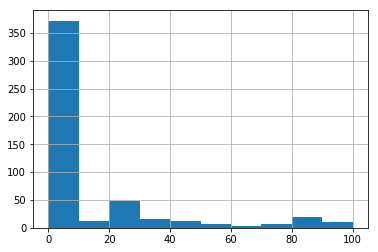

In [15]:
%matplotlib inline
df_x.ZN.hist()

In [16]:
df_x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state = 4)

In [0]:
model = linear_model.LinearRegression()

In [19]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model.coef_

array([[-1.15966452e-01,  4.71249231e-02,  8.25980146e-03,
         3.23404531e+00, -1.66865890e+01,  3.88410651e+00,
        -1.08974442e-02, -1.54129540e+00,  2.93208309e-01,
        -1.34059383e-02, -9.06296429e-01,  8.80823439e-03,
        -4.57723846e-01]])

In [0]:
y_pred = model.predict(x_test)

In [22]:
print(np.array(y_test)[1], y_pred[1])

[24.8] [26.9894969]


In [0]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
  -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
   2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
  -4.57723846e-01]]


In [25]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.42


In [27]:
print('R square: %.2f' % r2_score(y_test, y_pred))

R square: 0.73
